<a href="https://colab.research.google.com/github/Emersonmiady/houses-rent-br/blob/main/alugueis_brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aluguéis no Brasil

---

Um dos maiores desafios que as imobiliárias enfrentam é a precificação de seu imóvel, isso porque o mercado é extremamente dinâmico, logo exige um acompanhamento regular das tendências e perspectivas do setor por certos profissionais. Considerando a instabilidade econômica brasileira nesses últimos anos, esse setor adquiriu ainda mais dificuldades para retomar seu crescimento, sendo este um dos fatores que tornaram a precificação em uma tarefa complexa para as empresas.

Existem muitas coisas que um empreendedor nessa área deve se atentar, como a localização do imóvel, a infraestrutura e certas variáveis de mercado, exigindo uma pesquisa bem elaborada e uma precificação coerente, para que o cliente saia satisfeito e feche seu negócio!

<center><img src='https://raw.githubusercontent.com/Emersonmiady/houses-rent-br/main/img/negociation.jpg' width='800' height='450'></center>

Bom, recentemente eu estava navegando pelo *Kaggle* e me deparei com um conjunto de dados a respeito dos valores dos aluguéis em algumas cidades brasileiras. Eu fiquei pensando se seria possível aplicar alguns algoritmos de *machine learning* para conseguir prever um preço favorável. 

Vamos ver o que é possível fazer com esses dados! :)

<center><img src='https://raw.githubusercontent.com/Emersonmiady/houses-rent-br/main/img/house.jpg' width='1000' height='550'></center>

## Descrição dos dados

---

Esse é um *dataset* provido pelo **Rubens Junior**, um usuário que o publicou em um dos maiores *sites* que disponibilizam dados para a comunidade de *Data Science*, o [*Kaggle*](https://www.kaggle.com/).

De acordo com [esse *link*](https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent), existe a possibilidade de conter alguns valores no *dataset* que são considerados outliers. Tendo em vista que foi utilizado um *WebCrawler* apenas para pegar os dados, os mesmos estão sujeitos a problemas como erros no cadastros.

Segue uma mensagem de Rubens:

- "Eu não tenho propriedade de nenhum desses dados, todos eles foram retirados de informações disponíveis gratuitamente na internet e compilados apenas para facilitar o acesso."

In [1]:
# Importar as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

plt.style.use('ggplot')

In [2]:
# Importar os dados
url = 'https://raw.githubusercontent.com/Emersonmiady/houses-rent-br/main/dataset/houses_to_rent_v2.csv'
houses = pd.read_csv(url)

# Exibir o nome das colunas presentes
print('As colunas são:')
display(houses.columns)

As colunas são:


Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

### Dicionário das variáveis

Esse arquivo *csv* possui 13 colunas. São elas:
- **`city`:** cidade onde o imóvel está localizada;
  - 5 cidades.
- **`area`:** área do imóvel (m²);
- **`rooms`:** número de quartos;
  - 1 a 13 quartos.
- **`bathroom`:** número de banheiros;
  - 1 a 10 banheiros.
- **`parking spaces`:** número de vagas para automóveis;
  - 1 a 12 vagas.
- **`floor`:** andar do imóvel;
- **`animal`:** "aceita animais?";
  - *acept* - aceita;
  - *not acept* - não aceita.
- **`furniture`:** "é mobiliada?";
  - *furnished* - mobiliada;
  - *not furnished* - não mobiliada.
- **`hoa (R$)`:** valor do condomínio;
- **`rent amount (R$)`:** valor do aluguel;
- **`property tax (R$)`:** IPTU;
- **`fire insurance (R$)`:** seguro incêndio;
- **`total (R$)`:** valor total;

## Introdução
---

Para começar, abaixo temos o formato do *dataset*. Ele apresenta 10692 linhas, ou seja, casas, e 13 colunas, como já mencionado antes.

Uma prática recomendada, antes de iniciarmos a exploração de fato, é conferir se existem dados faltantes nesse *dataframe*. Os dados faltantes podem acabar interferindo na análise, principalmente quando utilizamos *machine learning*, tendo assim que substituí-los por algum outro valor, ou até mesmo retirar a coluna, caso haja uma quantidade elevada deles.

De acordo com as próximas linhas de código, não existem dados faltantes, então nenhuma manipulação será necessária.

In [3]:
# Exibir o formato do Dataframe
print("Formato do Dataframe:", houses.shape, "\n")

# Exibir a quantidade de valores faltantes por coluna
print("Abaixo estão as quantidades de valores faltantes:")
print(houses.isnull().sum(), "\n")

# Definir um estilo para os próximos gráficos
sns.set_style('white')

# Exibir as 5 primeiras linhas
print("Uma prévia dos dados:")
display(houses.head())

Formato do Dataframe: (10692, 13) 

Abaixo estão as quantidades de valores faltantes:
city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64 

Uma prévia dos dados:


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [4]:
# Exibir algumas informações
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


## Pré-processamento dos dados
---

### Transformação do "-"

Uma coisa estranha que eu notei, é que a coluna *floor* está representado como objeto, sendo que essa seria o número de andares. Vamos ver melhor o que está acontecendo.

In [5]:
# Exibir valores únicos de "floor"
print(houses.floor.unique())

['7' '20' '6' '2' '1' '-' '4' '3' '10' '11' '24' '9' '8' '17' '18' '5'
 '13' '15' '16' '14' '26' '12' '21' '19' '22' '27' '23' '35' '25' '46'
 '28' '29' '301' '51' '32']


Parece que existe um dado "-", podendo significar um valor não informado ou até mesmo igual a 0 (andar térreo). Sendo assim, na dúvida, vou trocá-lo por 0 pois creio que seja mais provável ser a última opção citada.

In [6]:
# Transformar o "floor" em número inteiro e trocar "-" para 0
houses['floor'] = houses['floor'].replace('-', 0).astype(int)
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


### Remoção de Outliers

Em seguida, exibirei algumas estatísticas importantes:

In [7]:
# Exibir estatísticas
houses.describe().T

,count,mean,std,min,25%,50%,75%,max
area,10692.0,149.217920,537.016942,11.0,56.00,90.0,182.0,46335.0
rooms,10692.0,2.506079,1.171266,1.0,2.00,2.0,3.0,13.0
bathroom,10692.0,2.236813,1.407198,1.0,1.00,2.0,3.0,10.0
parking spaces,10692.0,1.609147,1.589521,0.0,0.00,1.0,2.0,12.0
floor,10692.0,5.067995,6.069050,0.0,1.00,3.0,8.0,301.0
hoa (R$),10692.0,1174.021698,15592.305248,0.0,170.00,560.0,1237.5,1117000.0
rent amount (R$),10692.0,3896.247194,3408.545518,450.0,1530.00,2661.0,5000.0,45000.0
property tax (R$),10692.0,366.704358,3107.832321,0.0,38.00,125.0,375.0,313700.0
fire insurance (R$),10692.0,53.300879,47.768031,3.0,21.00,36.0,68.0,677.0
total (R$),10692.0,5490.487000,16484.725912,499.0,2061.75,3581.5,6768.0,1120000.0


Podemos notar que algumas variáveis como a área, valor do condomínio, IPTU e valor total, apresentam um alto desvio padrão (*std*)!

Isso significa que a dispersão desses dados é alta, podendo conter valores que são muito diferentes do normal (potenciais *outliers*), erros de cadastro ou falha na captação de casas pelo *webScrapping*.

Vamos tentar nos aprofundar e descobrir as casas que possuem valores exorbitantes de desvios padrões e valores máximos. Olhemos para as seguintes variáveis:

- `area`;
- `floor`;
- `hoa (R$)`;
- `property tax (R$)`;
- `total (R$)`.

Observe que não faz tanto sentido:

- uma área máxima de 46.335 m² e um desvio padrão de 5 vezes a média nessa variável.

- existir uma casa com 301 andares (o maior prédio do mundo é o *Burj Khalifa*, com 163 andares)... 

- uma taxa de condomínio custando R$1.117.000 e o desvio padrão valendo 15 vezes a média nessa variável.

- um total máximo de R\$1.120.000 a ser pago, mensalmente, assim como o desvio padrão ser bem alto.

Sendo assim, vamos tentar extrair esses dados, utilizando quartis acima de 75%, que é onde estão as brutalidades nos valores. Para isso, a função `catch_outliers` fará esse papel, primeiramente ordenando por certa *feature* e depois pegando os dados acima do terceiro quartil, retornando os dados por ordem decrescente:

In [8]:
# Função para resgatar os dados a partir de um certro quartil
def catch_outliers(feature, quantile):
  houses_copy = houses.copy()
  houses_copy_sorted = houses_copy.sort_values(feature)
  wanted_houses = houses_copy_sorted[int(len(houses_copy)*quantile):]
  wanted_houses = wanted_houses.sort_values(feature, ascending=False)
  return wanted_houses.head(10)

In [9]:
features = ['area', 'floor', 'hoa (R$)', 'property tax (R$)', 'total (R$)']
for feature in features:
  print(f'Casas acima do terceiro quartil da variável {feature}:')
  display(catch_outliers(feature, 0.75))
  print('\n')

Casas acima do terceiro quartil da variável area:


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
2397,Belo Horizonte,46335,4,8,5,11,acept,furnished,960,8500,646,114,10220
5915,São Paulo,24606,5,4,4,12,acept,not furnished,2254,8100,7859,103,18320
9241,Campinas,12732,3,2,0,3,acept,not furnished,700,1600,96,21,2417
8790,Belo Horizonte,2000,3,3,2,2,acept,furnished,3000,5000,200,67,8267
5129,Belo Horizonte,2000,4,2,3,0,acept,not furnished,0,4956,200,82,5238
654,São Paulo,1600,6,6,6,0,acept,furnished,0,7600,1834,115,9549
4813,São Paulo,1600,4,5,12,0,acept,not furnished,1,6900,5000,104,12010
3559,São Paulo,1100,4,6,10,0,acept,not furnished,3000,14000,2000,211,19210
2423,Belo Horizonte,1020,5,4,6,0,acept,furnished,0,6520,654,107,7281
6615,Belo Horizonte,1000,5,4,3,15,acept,not furnished,1255,7000,634,94,8983




Casas acima do terceiro quartil da variável floor:


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
2562,Belo Horizonte,80,3,2,2,301,acept,not furnished,750,2600,164,35,3549
5694,Campinas,64,2,2,2,51,acept,not furnished,800,1900,129,25,2854
1654,São Paulo,353,4,5,5,46,acept,not furnished,3000,10000,0,127,13130
671,São Paulo,250,3,2,3,35,acept,furnished,2500,15000,1084,191,18780
10179,São Paulo,51,1,1,0,32,not acept,not furnished,429,3250,37,42,3758
6096,São Paulo,84,2,3,2,32,not acept,furnished,850,8500,450,108,9908
2522,São Paulo,77,1,2,1,29,acept,furnished,750,7740,209,99,8798
5528,Belo Horizonte,305,4,5,5,29,acept,not furnished,4596,14000,2239,187,21020
2709,São Paulo,105,1,1,2,29,not acept,not furnished,1300,8700,417,111,10530
4389,São Paulo,292,4,4,4,29,acept,not furnished,1700,5000,686,64,7450




Casas acima do terceiro quartil da variável hoa (R$):


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
255,Belo Horizonte,155,1,4,0,4,not acept,not furnished,1117000,2790,64,38,1120000
6979,Belo Horizonte,155,1,4,0,4,not acept,not furnished,1117000,2790,64,38,1120000
6230,São Paulo,340,5,4,2,7,acept,not furnished,220000,12000,1000,153,233200
2859,São Paulo,285,4,5,4,6,acept,furnished,200000,20000,1834,254,222100
2928,Rio de Janeiro,35,1,1,0,1,acept,furnished,81150,4500,9900,58,95610
1444,Porto Alegre,42,1,1,0,10,acept,not furnished,32000,700,40,11,32750
1213,São Paulo,850,6,7,4,0,not acept,not furnished,15000,13000,2465,196,30660
415,São Paulo,488,4,3,3,0,acept,not furnished,14130,6400,1214,82,21820
5293,São Paulo,850,5,7,8,1,not acept,not furnished,14000,4000,0,51,18050
8858,São Paulo,800,4,7,8,0,not acept,not furnished,10000,8500,209,128,18840




Casas acima do terceiro quartil da variável property tax (R$):


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
6645,São Paulo,42,1,2,1,6,not acept,not furnished,690,2500,313700,32,316900
6243,Rio de Janeiro,95,2,2,1,11,acept,not furnished,1024,3000,28120,39,32180
1699,São Paulo,700,4,4,4,0,acept,not furnished,0,10000,21880,151,32040
10172,Belo Horizonte,260,4,4,6,10,acept,furnished,3200,11900,12500,159,27760
5331,São Paulo,300,4,5,5,6,not acept,not furnished,3500,1990,10830,26,16350
2928,Rio de Janeiro,35,1,1,0,1,acept,furnished,81150,4500,9900,58,95610
19,São Paulo,600,4,5,6,0,acept,not furnished,0,12000,9500,181,21680
7674,São Paulo,890,5,6,8,0,not acept,not furnished,0,11000,9500,166,20670
8187,São Paulo,700,4,10,0,0,acept,not furnished,0,15000,8750,226,23980
2182,São Paulo,700,4,7,8,0,acept,not furnished,0,45000,8750,677,54430




Casas acima do terceiro quartil da variável total (R$):


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
6979,Belo Horizonte,155,1,4,0,4,not acept,not furnished,1117000,2790,64,38,1120000
255,Belo Horizonte,155,1,4,0,4,not acept,not furnished,1117000,2790,64,38,1120000
6645,São Paulo,42,1,2,1,6,not acept,not furnished,690,2500,313700,32,316900
6230,São Paulo,340,5,4,2,7,acept,not furnished,220000,12000,1000,153,233200
2859,São Paulo,285,4,5,4,6,acept,furnished,200000,20000,1834,254,222100
2928,Rio de Janeiro,35,1,1,0,1,acept,furnished,81150,4500,9900,58,95610
2182,São Paulo,700,4,7,8,0,acept,not furnished,0,45000,8750,677,54430
1444,Porto Alegre,42,1,1,0,10,acept,not furnished,32000,700,40,11,32750
6243,Rio de Janeiro,95,2,2,1,11,acept,not furnished,1024,3000,28120,39,32180
1699,São Paulo,700,4,4,4,0,acept,not furnished,0,10000,21880,151,32040


In [10]:
# Quero remover as linhas dos dataframes abaixo:
indexes_to_remove = []

# 3 primeiras linhas do dataframe (acima) de area 
area_to_remove = catch_outliers('area', 0.75).head(3).index
for i in area_to_remove:
  indexes_to_remove.append(i)

# Primeira linha do dataframe (acima) de floor 
floor_to_remove = catch_outliers('floor', 0.75).head(1).index
for i in floor_to_remove:
  indexes_to_remove.append(i)

# 6 primeiras linhas do dataframe (acima) de hoa (R$)
hoa_to_remove = catch_outliers('hoa (R$)', 0.75).head(6).index
for i in hoa_to_remove:
  indexes_to_remove.append(i)

# Primeira linha do dataframe (acima) de property tax (R$)
property_tax_to_remove = catch_outliers('property tax (R$)', 0.75).head(1).index
for i in property_tax_to_remove:
  indexes_to_remove.append(i)

print('Índices das linhas a serem removidos:')
print(indexes_to_remove)

# Obs: Não removi de total (R$) pois escolhendo essas linhas acima, 
# automaticamente os outliers de total (R$) são removidos

Índices das linhas a serem removidos:
[2397, 5915, 9241, 2562, 255, 6979, 6230, 2859, 2928, 1444, 6645]


Agora, é só dropar todos os índices extraídos acima:

In [11]:
houses.drop(indexes_to_remove, inplace=True)

Vamos ver como ficou a tabela das estatísticas agora:

In [12]:
# Exibir estatísticas
houses.describe().T

,count,mean,std,min,25%,50%,75%,max
area,10681.0,141.431608,134.365332,11.0,56.0,90.0,182.0,2000.0
rooms,10681.0,2.505945,1.170721,1.0,2.0,2.0,3.0,13.0
bathroom,10681.0,2.235652,1.406042,1.0,1.0,2.0,3.0,10.0
parking spaces,10681.0,1.609119,1.589263,0.0,0.0,1.0,2.0,12.0
floor,10681.0,5.039041,5.353293,0.0,1.0,3.0,8.0,51.0
hoa (R$),10681.0,915.657335,1127.736085,0.0,170.0,557.0,1233.0,15000.0
rent amount (R$),10681.0,3894.073120,3404.999365,450.0,1530.0,2660.0,5000.0,45000.0
property tax (R$),10681.0,335.683550,678.884163,0.0,38.0,125.0,375.0,28120.0
fire insurance (R$),10681.0,53.275536,47.733330,3.0,21.0,36.0,68.0,677.0
total (R$),10681.0,5198.878476,4489.431517,499.0,2060.0,3578.0,6758.0,54430.0


Mesmo com desvios padrões bem altos de algumas variáveis, acho que está tudo bem deixar assim, pois pensando em um contexto real, é normal termos valores bem diferente do padrão, para algumas casas/mansões em específico, ou dependendo da localidade em que aquele imóvel está...

Beleza, conseguimos remover alguns outliers!

## Análise exploratória dos dados

---

Para começar, vamos ter uma visão geral de como é a nossa variável *target*, vamos ver a sua distribuição. Para isso, fiz uma função que mostra o histograma e o *boxplot* de uma determinada variável.

In [13]:
# Fazer uma função que exibe histograma e boxplot em sequência
def show_histogram_boxplot(col, dataset):
  plt.figure(figsize=(12,12))

  plt.subplot(2, 1, 1)
  sns.histplot(data=dataset, x=col, kde=True)

  plt.subplot(2, 1, 2)
  sns.boxplot(data = dataset, x=col)

  plt.show()
  return;

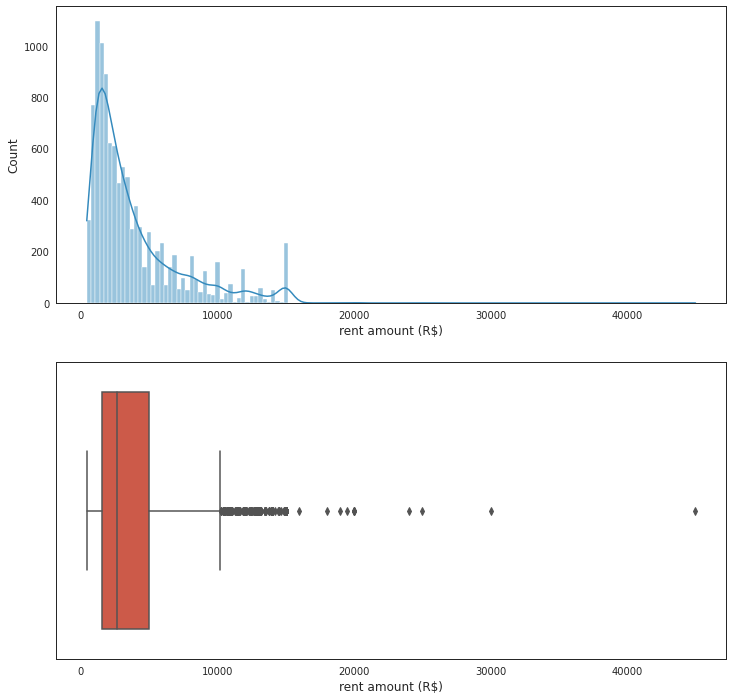

In [14]:
# Exibir histograma e boxplot de "total (R$)"
show_histogram_boxplot('rent amount (R$)', houses)

Desses gráficos, notamos que:
- A maioria (dados sem outliers) dos valores de aluguel estão abaixo dos 10 mil reais, aproximadamente.

### Existe correlações entre as variáveis?

Será que existe alguma relação linear entre duas variáveis quantitativas? Em outras palavras, se duas classes aumentam/diminuem juntas?

Vamos explorar isso pelos coeficientes de correlação de Pearson, além dos gráficos de dispersão. 

Lembrando que os valores de correlação, variam de -1 a 1, tendo uma relação:
- Positiva: perto de 1;
- Negativa: perto de -1;
- Neutra (nenhuma): perto de 0.

Observação: para nós aplicarmos algumas visualizações entre as variáveis numéricas, seria interessante as separarmos do conjunto de dados antes.

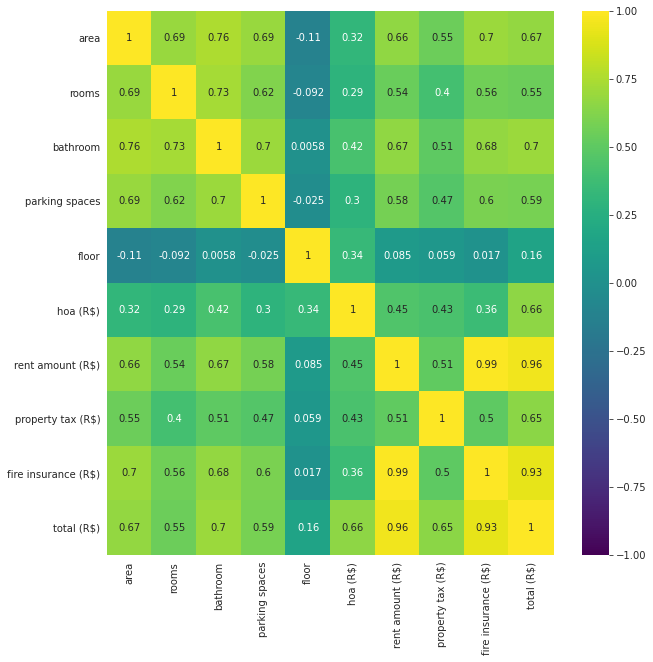

In [15]:
# Dividir o dataset em dados numéricos
houses_numerical = houses[houses.dtypes[houses.dtypes != 'object'].index]

# Exibir heatmap (mapa térmico de correlação)
houses_correlated = houses_numerical.corr()

plt.figure(figsize=(10,10))
houses_heatmap = sns.heatmap(houses_correlated, annot=True, 
                             vmax=1, vmin=-1, cmap='viridis')
plt.show()

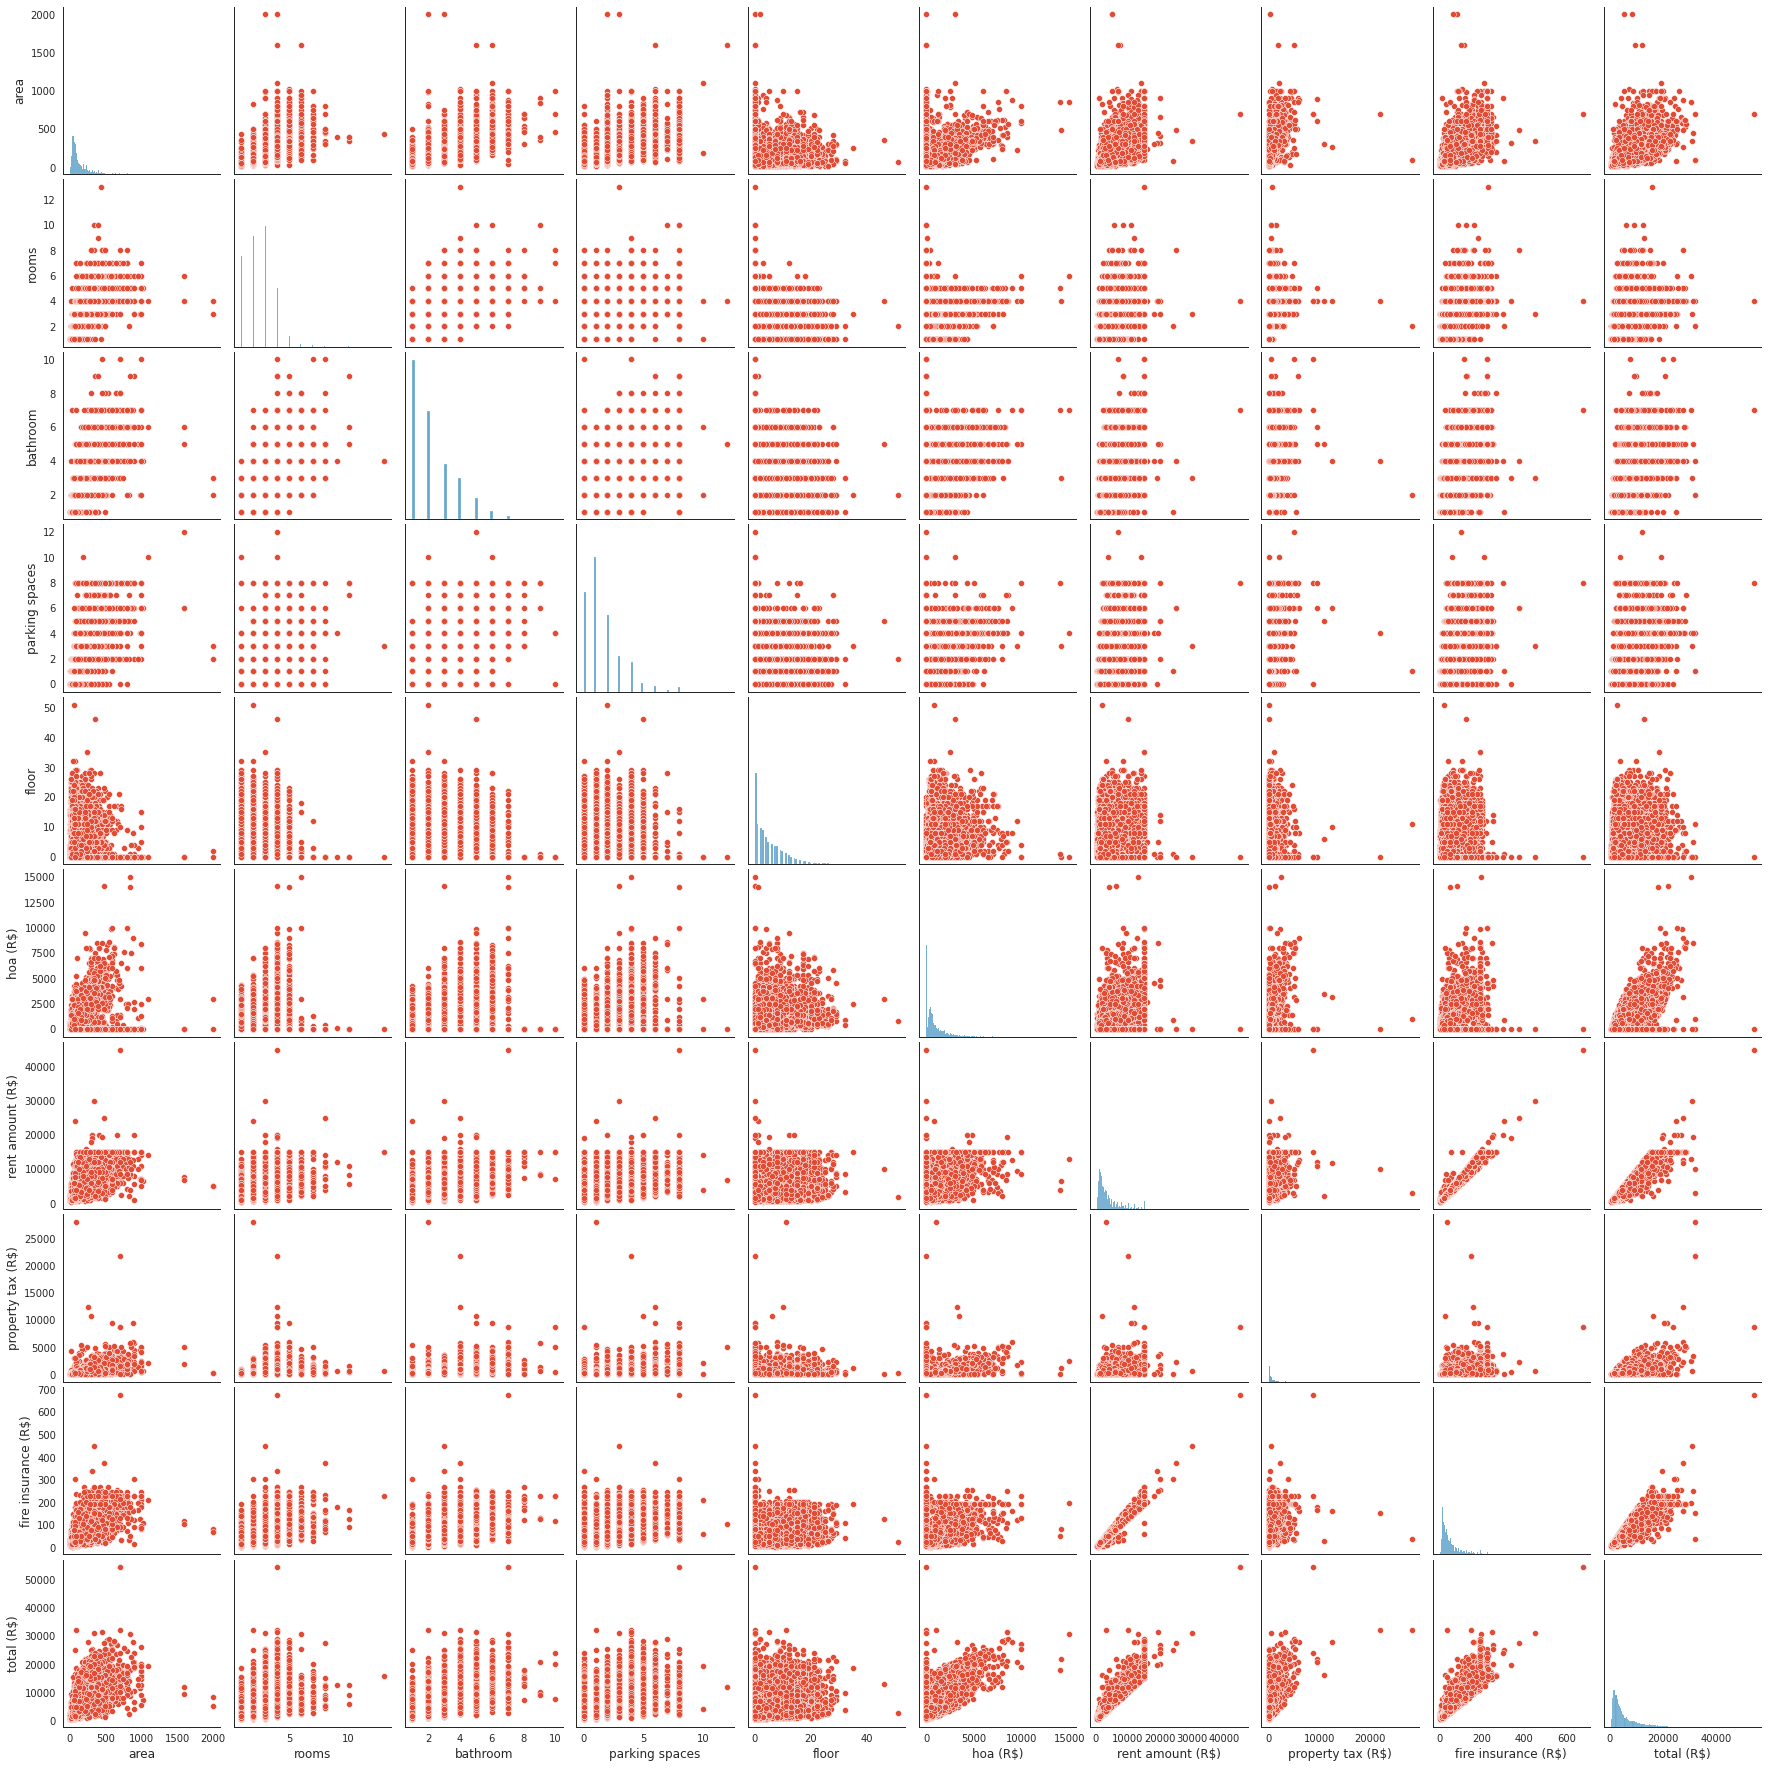

In [16]:
# Exibir todos os scatterplots possíveis
sns.pairplot(houses_numerical)
plt.show()

Aparentemente, as variáveis que chegam perto de uma reta, são:

- `fire insurance (R$)` com `rent amount (R$)`: 0,99 de correlação;
- `fire insurance (R$)` com `total (R$)`: 0.93 de correlação;
- `rent amount (R$)` com `total (R$)`: 0.96 de correlação.

Uma coisa que precisamos lembrar depois, quando prevermos alguns valores, é de **remover** a `fire insurance (R$)` e a `total (R$)`, pois como apresentam **altos índices de correlação** entre si e também junto da variável alvo (`rent amount (R$)`), não é legal utilizá-las para o *Machine Learning*, podendo viciar a nossa máquina preditiva, ocasionando em *overfitting*!

### Analisando os dados por categorias

Antes de tirar algumas informações desse conjunto, vamos ver quantas casas por cidade existem:

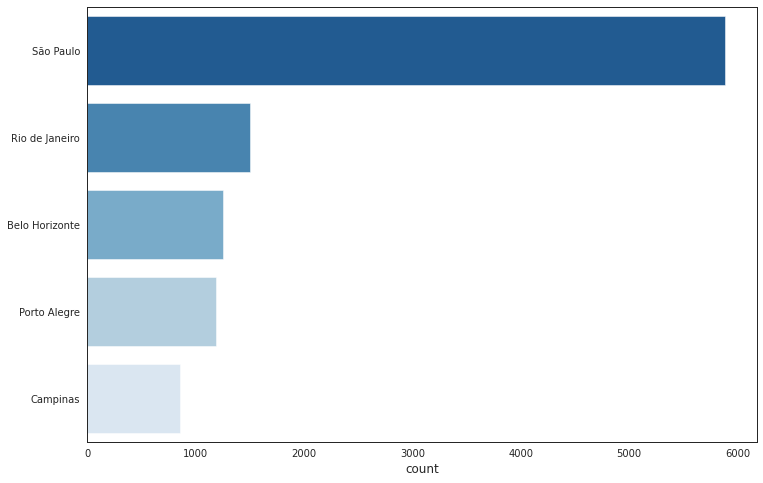

In [ ]:
# Exibir a quantidade de casas por cidade
plt.figure(figsize=(12, 8))
houses_count = pd.DataFrame(houses['city'].value_counts().rename('count'))
sns.barplot(x=houses_count['count'], y=houses_count.index, palette='Blues_r')
plt.show()

Há uma quantidade muito maior de casas em São Paulo nesse *dataset*.

E quanto aos "valores médios" do aluguel total separados por localidade?

Se pensarmos na média, podemos estar nos baseando em medidas falsas, pois podem conter valores que distorcem muito a realidade. Vamos ver na prática como isso acontece:

,city,rent amount mean (R$)
0,São Paulo,4648.716131
1,Belo Horizonte,3662.514354
2,Rio de Janeiro,3232.059333
3,Campinas,2365.187793
4,Porto Alegre,2339.073826


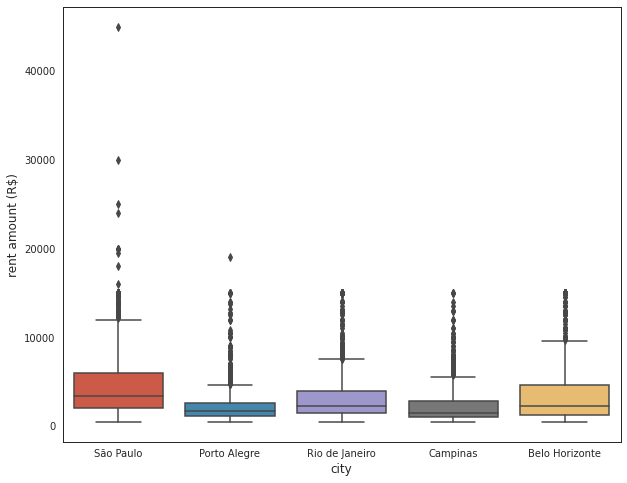

In [ ]:
# Exibir a média do "rent amount (R$)" por cidade
houses_total_ordered_mean = houses.groupby('city')['rent amount (R$)'].mean().sort_values(ascending = False).rename('rent amount mean (R$)')
display(houses_total_ordered_mean.reset_index())
print('\n')

# Exibir boxplot do "rent amount (R$)" por cidade
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='city', y='rent amount (R$)', data=houses)
plt.show()

Como o esperado, existem valores discrepantes que podem alterar muito a média. Imagine o maior valor de São Paulo, aquele ponto acima dos 40 mil reais, alteraria a média de forma grotesca, sendo que é um caso muito isolado!

Uma solução, é pegar a mediana de cada valor por cidade. Aqui temos a medida nos 50% dos dados, ou seja, um valor muito mais representativo.

In [ ]:
# Exibir a mediana do valor total por cidade
houses_total_ordered_median = houses.groupby('city')['rent amount (R$)'].median().sort_values(ascending = False).rename('rent amount median (R$)')

display(houses_total_ordered_median.reset_index())

,city,rent amount median (R$)
0,São Paulo,3400
1,Rio de Janeiro,2300
2,Belo Horizonte,2300
3,Porto Alegre,1650
4,Campinas,1500


Pelo visto a cidade com a medida mais alta ainda é **São Paulo**, mas repare que a ordem das cidades, do maior valor ao menor, acabou mudando! Além de que houve uma diminuição, em reais, considerável.

Agora podemos supor que **Campinas** é a cidade mais aconselhavel para se alugar uma casa, por conta de seu preço mediano baixo. Entretanto, podemos acabar encontrando menos casas para se alugar, enquanto que São Paulo pode ser mais fácil, presumindo pela quantidade de dados nesse conjunto.

Algumas informações que eu gostaria de saber também são:
- Existem mais casas que aceitam animais ou não?
- O aluguel se altera muito com a liberação de animais na casa?
- A maioria das casas por cidade são imobiliadas?
- Há uma alta variação no aluguel com a casa sendo imobiliada?
- Qual a quantidade de casas pelo número de andares?
- Quantos cômodos, banheiros e vagas normalmente as casas possuem?

Antes de tentar chegar a algumas respostas, fiz uma função que exibe um gráfico de barras para variáveis quantitativas, as quais possuem 2 únicos valores, ao lado de outro que exibe essas variáveis por cidade.

In [ ]:
# Fazer a função dos dois gráficos citados acima
def show_two_barplots(x_col, city, data):
  plt.figure(figsize=(16, 8))
  plt.subplot(1, 2, 1)
  sns.countplot(x=x_col, data=data)

  plt.subplot(1, 2, 2)
  sns.countplot(x=city, hue=x_col, data=data)
  plt.show()
  return;

#### Sobre os animais

Vamos primeiramente ver a contagem das casas que aceitam animais:

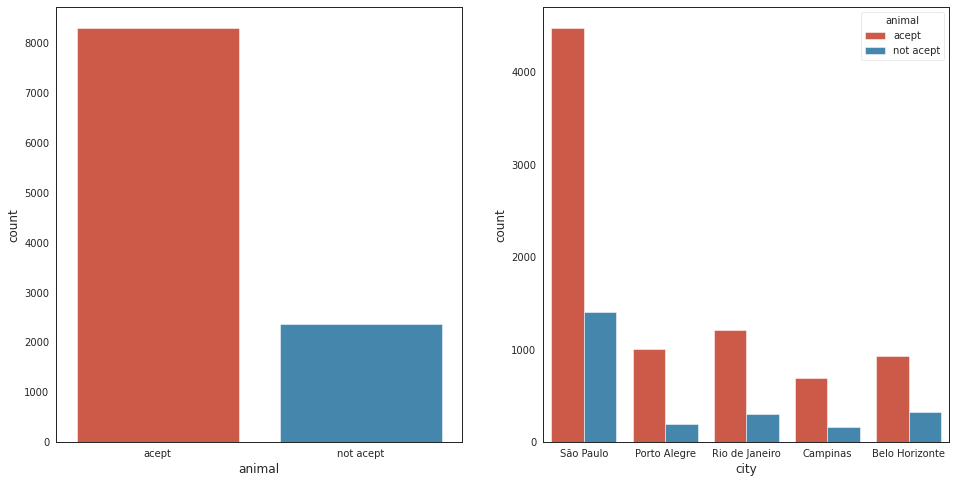

In [ ]:
# Exibir contagem das casas que aceitam animais e contagem disso por cidade
show_two_barplots('animal', 'city', houses)

Bom, existem muito mais casas que aceitam animais! Isso olhando para qualquer cidade, a diferença em quantidades é muito alta.

 A cidade que mais se destaca, pelo menos no tamanho da barra, é São Paulo, atingindo um número acima de 4.000 casas que aceitam esses mascotes.

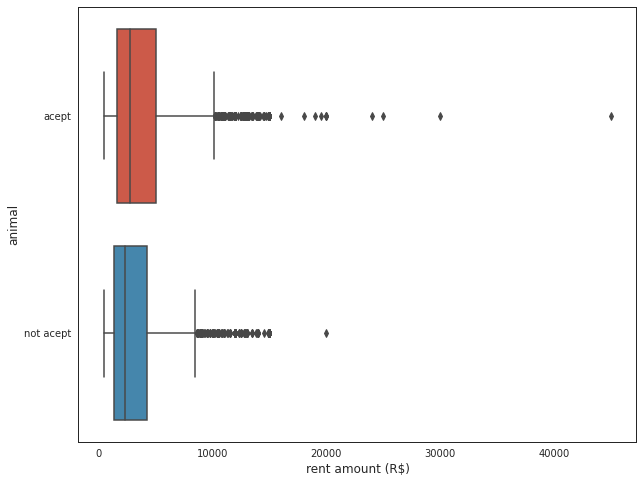

In [ ]:
# Exibir boxplot de "animal" com "rent amount (R$)"
plt.figure(figsize=(10, 8))
sns.boxplot(x='rent amount (R$)', y='animal', data=houses)
plt.show()

A variedade dos aluguéis que aceitam animais também é maior, atingindo um máximo (sem *outliers*) de aproximadamente, 10.000 reais. Entretanto, a faixa de preços das duas categorias não se diferencia muito, na grande parte das casas.

#### Sobre ser mobiliada

Novamente as contagens das casas que são mobiliadas ou não seguem abaixo:

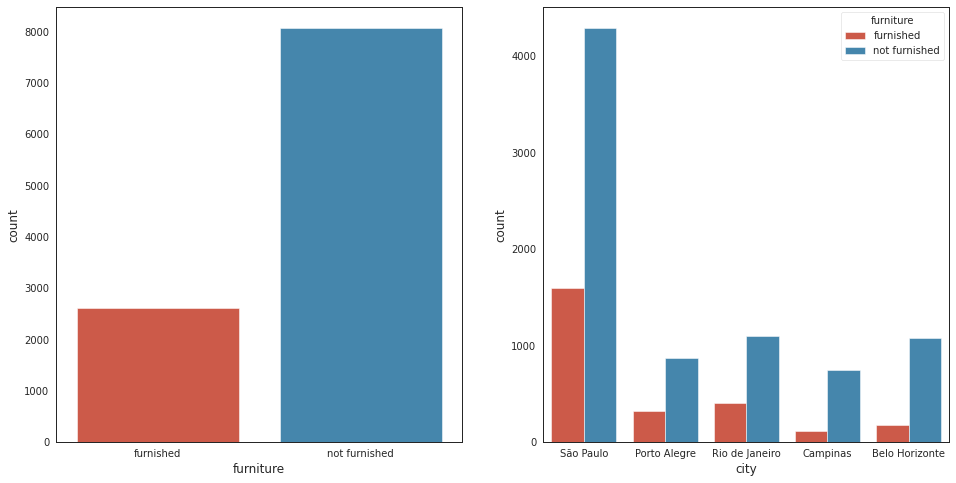

In [ ]:
# Exibir contagem das casas que são imobiliadas e contagem disso por cidade
show_two_barplots('furniture', 'city', houses)

Existem muito mais casas que não são mobiliadas! Em todas as casas, essa afirmação não é uma exceção. 

Da mesma forma das casas que possibilitam a entrada de animais, São Paulo tem uma contagem expressiva nos valores que não são mobiliadas.

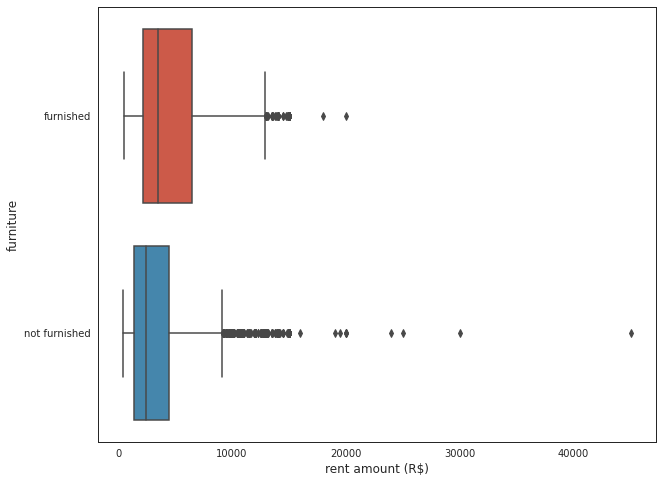

In [ ]:
# Exibir boxplot de "furniture" com "rent amount (R$)"
plt.figure(figsize=(10, 8))
sns.boxplot(x='rent amount (R$)', y='furniture', data=houses)
plt.show()

O *boxplot* vermelho nos diz que o preço da maioria das casas mobiliadas (retirando os outliers) cobre um intervalo maior que as não mobiliadas. Enquanto que o azul possui casas com valores que não variam muito, tendo uma concentração deles abaixo dos 10 mil reais!

Podemos notar também que o último tem um número maior de *outliers*, além de que alguns, são valores bem mais altos se comparado com a primeira caixa (o maior valor das casas não mobiliadas passa de 40.000 reais!).

Sendo assim, podemos dizer que as casas não mobiliadas, em sua grande parte, apresentam preços menores que as mobiliadas!

#### Sobre os andares

Abaixo é mostrado a quantidade de casas pelo andar que determinada construção está.

Lembre-se que a variável `floor` tinha valores com "-", ou seja, não sabemos o real significado disso, pode ser que muitos dados da quantidade de andares estejam indisponíveis, e a troca pelo 0 no caso, não estaria fazendo sentido. Mas finjamos que o 0 representa o andar "térreo".

Sendo assim, vou plotar o gráfico de barras para ver como estão distribuídas de acordo com os andares.

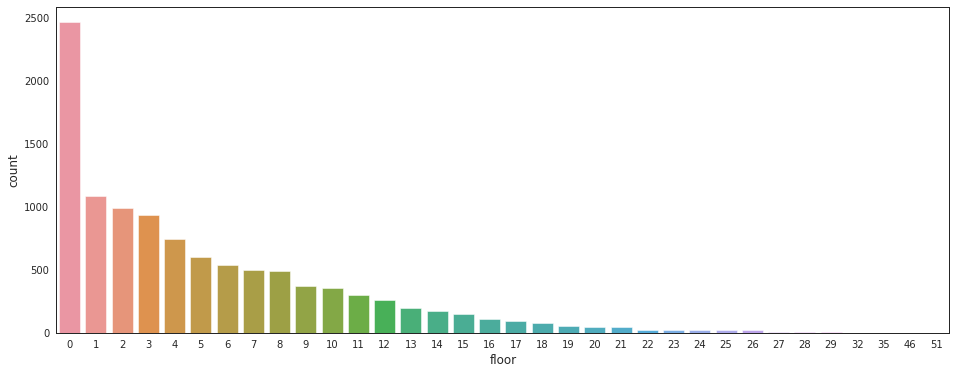

In [ ]:
# Exibir barplot de "floor"
plt.figure(figsize=(16, 6))
sns.countplot(x='floor', data=houses)
plt.show()

Pelo visto, existe um número considerável de moradias no térreo (`floor` = 0)! Vamos ver as porcentagens de casas em relação ao total de moradias:

In [ ]:
print('Porcentagem de casas em relação as moradias:')
print(round(len(houses.query('floor == "0"')) / len(houses) * 100, 2), '%')

Porcentagem de casas em relação as moradias:
23.04 %


Concluímos então que a maioria dos lugares para morar são prédios, entretanto, ao comparar os valores únicos por andar, o número que mais aparece no *dataset* é o 0.

#### Sobre as outras variáveis
Vamos observar como estão distribuídos os dados de algumas variáveis, por meio de *barplots* e *violinplots*:

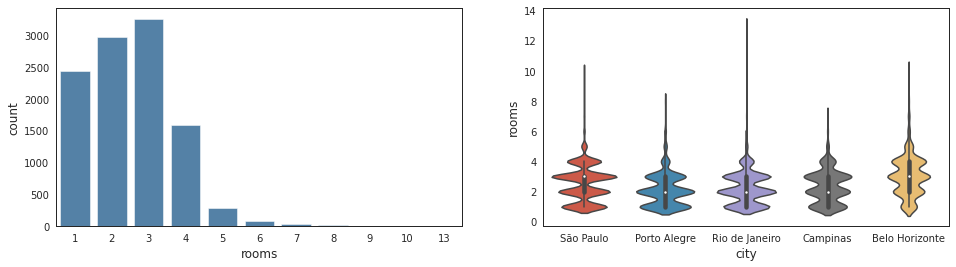

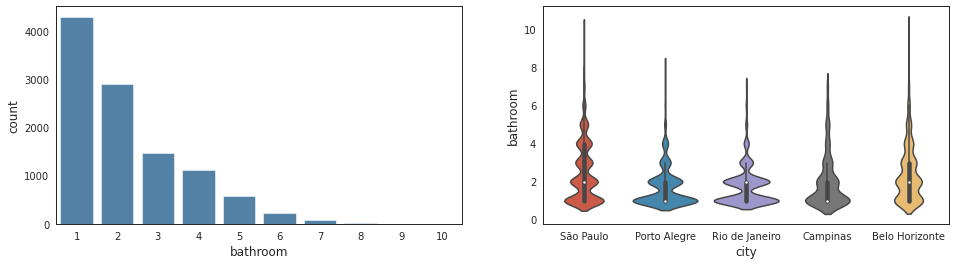

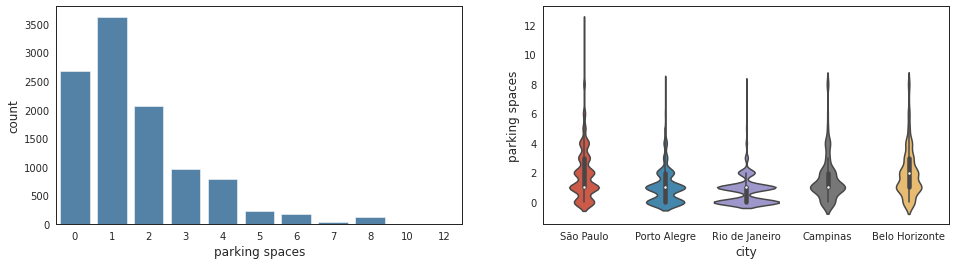

In [ ]:
# Exibir countplot de "rooms","bathroom" e "parking spaces" junto dos violinplots dessas variáveis, por cidade
some_variables = ['rooms', 'bathroom', 'parking spaces']

for variable in some_variables:
  plt.figure(figsize=(16, 4))
  plt.subplot(1, 2, 1)
  sns.countplot(x=variable, data=houses, color='steelblue')

  plt.subplot(1, 2, 2)
  sns.violinplot(x='city', y=variable, data=houses)
plt.show()

Observações:
- Pela lei da oferta e da procura, as pessoas buscam casas que possuem de:
  - 1 a 3 cômodos, com 3 sendo a prefência;
  - 0 a 2 vagas de automóveis, com 1 vaga preferencialmente;
  - 1 a 2 banheiros.
- A maioria das casas possuem até 2 banheiros, sendo assim, mais do que isso, normalmente não é tão procurado pelas pessoas;
- Sobre os *violinplots*, eles se comportam de forma parecida com as informações anteriores, para todas as cidades.



## *Machine Learning*

---

Para finalizar, vou aplicar alguns modelos de *machine learning* e definir qual é aquele com a melhor previsão. Em resumo, o que acontece é que o computador consegue, a partir de funções matemáticas (não explicadas nesse *notebook*), encontrar padrões para enfim, prever as futuras entradas.

O processo segue algumas etapas, como retirar as colunas que eu não quero rodar no código e também, as que ficam redundantes por transformá-las em variáveis "*dummies*". Em seguida, dividimos o *dataset* em "treino" e "teste", como meio de conseguir testar o quanto aquele algoritmo é confiável. Então vamos a prática!

### Retirando algumas variáveis



Antes de iniciarmos de fato, vamos analisar a variável `floor`. 

Será que a maioria das pessoas realmente procuram em qual andar ficar? Tirando aqueles que possuem mais poder aquisitivo, as quais querem ficar nos últimos andares, **não existe uma busca fervorosa por este atributo**, pelo menos é o que eu penso...

Sendo assim, acho melhor retirar a feature `floor`, pois ela pode mais atrapalhar do que ajudar!

Também retirarei as colunas mencionadas lá no começo (`fire insurance (R$)` e `total (R$)`), na seção "Existe correlações entre as variáveis?", pois podem contribuir com o *overfitting*!

In [ ]:
# Retirar as colunas indesejáveis
houses.drop(['floor', 'fire insurance (R$)', 'total (R$)'], 
            axis=1, inplace=True)

In [ ]:
# Transformar as variáveis qualitativas em dummies
houses_dummies = pd.get_dummies(houses)
display(houses_dummies.head())

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),city_Belo Horizonte,city_Campinas,city_Porto Alegre,city_Rio de Janeiro,city_São Paulo,animal_acept,animal_not acept,furniture_furnished,furniture_not furnished
0,70,2,1,1,2065,3300,211,0,0,0,0,1,1,0,1,0
1,320,4,4,0,1200,4960,1750,0,0,0,0,1,1,0,0,1
2,80,1,1,1,1000,2800,0,0,0,1,0,0,1,0,0,1
3,51,2,1,0,270,1112,22,0,0,1,0,0,1,0,0,1
4,25,1,1,0,0,800,25,0,0,0,0,1,0,1,0,1


In [ ]:
# Retirar algumas colunas redundantes
houses_dummies.drop(['city_São Paulo',
                     'animal_not acept',
                     'furniture_not furnished'], inplace=True, axis=1)

In [ ]:
# Exibir novamente as 5 primeiras linhas desse novo dataframe
display(houses_dummies.head())

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),city_Belo Horizonte,city_Campinas,city_Porto Alegre,city_Rio de Janeiro,animal_acept,furniture_furnished
0,70,2,1,1,2065,3300,211,0,0,0,0,1,1
1,320,4,4,0,1200,4960,1750,0,0,0,0,1,0
2,80,1,1,1,1000,2800,0,0,0,1,0,1,0
3,51,2,1,0,270,1112,22,0,0,1,0,1,0
4,25,1,1,0,0,800,25,0,0,0,0,0,0


### Dividindo em X e y

In [ ]:
# Dividir o dataset em treino e teste
X = houses_dummies.drop('rent amount (R$)', axis=1).values
y = houses_dummies['rent amount (R$)'].values

Então já dividimos os dados em `X` (variáveis independentes) e `y` (variável dependente) e falta somente testar nossos modelos. Entretanto, ao invés de fazer a divisão em treino e teste, vou utilizar o **cross-validation** para obter mais certeza em relação aos nossos resultados (retirar o fator de aleatoriedade).

### Cross-validation

In [ ]:
# Definindo a função que padroniza os dados, deixando os dados 
# quantitativos em uma outra escala
sc = StandardScaler()

# Definindo a função que aplica o StandardScaler em certas colunas
ct = make_column_transformer((sc, np.arange(6)), 
                             remainder='passthrough')

# Definindo o cross-validation
cv = KFold(n_splits=5)

Vou agora aplicar os algoritmos e ver suas pontuações, sendo eles:
- *K-Neighbors Regressor*;
- *Linear Regression*;
- *Ridge Regression*;
- *Lasso Regression*;
- *Decision Tree Regressor*;
- *Random Forest Regressor*.

**Observação:** as previsões são avaliadas a partir do **RMSE** (Raiz Quadrada do Erro Médio), cuja fórmula é representada abaixo:

\begin{equation}
RMSE = \sqrt{\sum_{i=1}^{n} \frac{(\hat{y_i} - y_i)^2}{n}}
\end{equation}

em que o:

$\hat{y_i}$ = valor previsto;

$y_i$ = valor real;

$n$ = número total de amostras.

Ou seja, quanto menor o RMSE, melhor é o nosso modelo, pois a somatória do erro do valor previsto, em relação ao valor original, é o mínimo possível.

In [ ]:
# Definindo todos os modelos para serem testados
knn = KNeighborsRegressor()
reg = LinearRegression()
ridge = Ridge(alpha=0.1, normalize=True)
lasso = Lasso(alpha=0.1, normalize=True)
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

models = [knn, reg, ridge, lasso, dt, rf]
model_names = ['K-Neighbors Regressor', 'Linear Regression', 
               'Ridge Regression', 'Lasso Regression', 
               'Decision Tree Regressor', 'Random Forest Regressor']

In [ ]:
# Definindo um vetor para armazenar os scores de todos os modelos
rmse = []

# Classificá-los pela melhor previsão
for model in models:
  pipeline = make_pipeline(ct, model)
  score = np.mean(cross_val_score(pipeline, X, y, cv=cv, 
                                  scoring='neg_root_mean_squared_error') * (-1))
  rmse.append(score)
  
scores_df = pd.DataFrame(rmse, columns=['RMSE médio'], index=model_names)
scores_df = scores_df.sort_values('RMSE médio')

display(scores_df)

,RMSE médio
Random Forest Regressor,2105.744633
K-Neighbors Regressor,2194.701365
Linear Regression,2203.572288
Lasso Regression,2203.786990
Ridge Regression,2206.391026
Decision Tree Regressor,2837.173915


Top! Agora sabemos que o algoritmo ***Random Forest Regressor*** é o melhor, por ter o **menor RMSE**! Será que conseguimos melhorar ainda mais nossa árvore aleatória e além disso, conseguir testar a sua performance?

**Lembrando:** queremos um RMSE, para a *Random Forest*, abaixo de: 

In [ ]:
print(scores_df.iloc[0, 0])

2105.7446325621686


### Tuning de Hiperparâmetros

A resposta é sim! Vamos fazer o *tunning* de hiperparâmetros da nossa *random forest regressor* junto do ***Grid Search***, separando alguns dados para a validação final. Segue uma imagem ilustrativa do que será feito:

<center><img src='https://scikit-learn.org/stable/_images/grid_search_cross_validation.png'></center>

In [ ]:
# Separando os dados para a validação final
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train[:, :6] = sc.fit_transform(X_train[:, :6])
X_test[:, :6] = sc.transform(X_test[:, :6])

Usaremos então, para o cross validate, somente os dados de treino (`X_train` e `y_train`) criados acima, e também vou definir abaixo, os hiperparâmetros desejados:

In [ ]:
params = {'max_features' : ['auto', 'sqrt', 'log2', 1, 2, 3, 4, 5], # 1
          'n_estimators' : np.arange(10, 510, 10), # 2
          'min_samples_leaf' : [1, 2, 3, 4, 5]} # 3

# 1: número de árvores construídas pelo algoritmo;

# 2: número máximo de features a serem utilizadas pelo algoritmo na 
#    construção de uma dada árvore.

# 3: número mínimo de amostras para estar em um nó.

In [ ]:
# Aplicando o GridSearchCV
grid = GridSearchCV(estimator=rf, param_grid=params, 
                    scoring='neg_root_mean_squared_error', cv=cv,
                    n_jobs=-1)

grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n...
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90,

In [ ]:
# Modelo selecionado pelo grid
print('Modelo selecionado pelo GridSearch:')
print(grid.best_estimator_)

Modelo selecionado pelo GridSearch:
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=170, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


In [ ]:
print(f'Novo RMSE: {-grid.best_score_}')
print(f'Tivemos uma diferença de: {scores_df.iloc[0, 0] + grid.best_score_}')

Novo RMSE: 2259.137589292574
Tivemos uma diferença de: -153.39295673040533


In [ ]:
# Tentando predizer os valores com a nossa nova floresta
new_rf = grid.best_estimator_
y_pred = new_rf.predict(X_test)

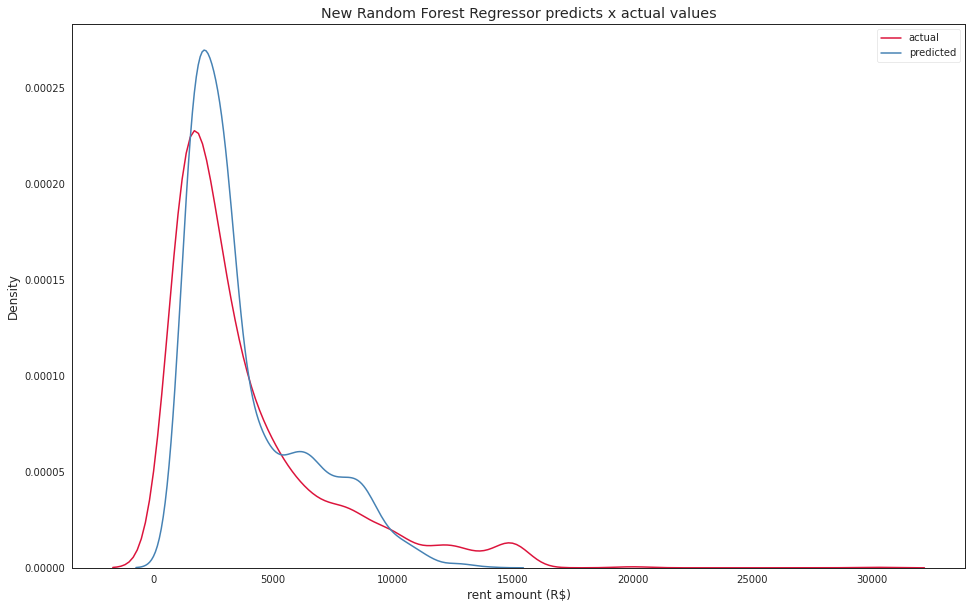

In [ ]:
# Exibir gráfico de linha para "rent amount (R$)" atual e que foi 
# predito pela nova floresta
plt.figure(figsize=(16, 10))
sns.kdeplot(y_test, color='crimson', label='actual')
sns.kdeplot(y_pred, color='steelblue', label='predicted')
plt.xlabel('rent amount (R$)')
plt.title('New Random Forest Regressor predicts x actual values')
plt.legend()
plt.show()

Bom, por incrível que pareça, o novo modelo teve um **RMSE médio maior que a *Random Forest* anterior**, o que é ruim. Sendo assim, vou optar  pela primeira floresta, a que vem com os parâmetros iniciais do *sklearn*.

In [ ]:
# Definindo as predições
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

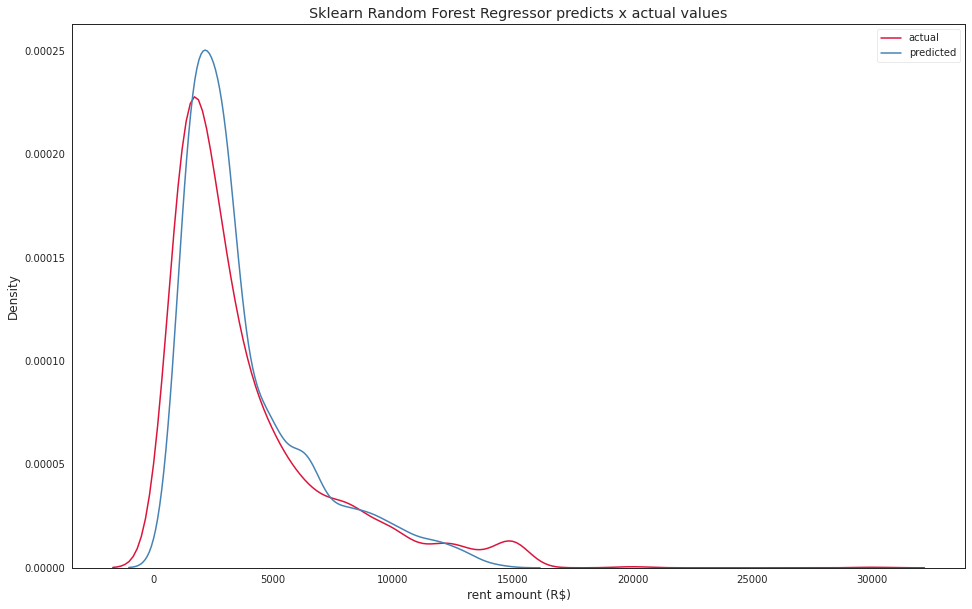

In [ ]:
# Exibir gráfico de linha para "rent amount (R$)" atual e que foi predito
plt.figure(figsize=(16, 10))
sns.kdeplot(y_test, color='crimson', label='actual')
sns.kdeplot(y_pred, color='steelblue', label='predicted')
plt.xlabel('rent amount (R$)')
plt.title('Sklearn Random Forest Regressor predicts x actual values')
plt.legend()
plt.show()

Enfim, vamos ver algum valor hipotético! Vamos supor que eu queira precificar um aluguel com as seguintes especificações:

- Área de 250 m²;
- 3 quartos;
- 2 banheiros;
- 1 vaga;
- Valor do condomínio (aproximado): R\$ 1.700;
- Valor do IPTU (aproximado): R\$ 1.000;
- Localizada em São Paulo;
- Permissão da entrada de animais;
- Não sendo mobiliada.

Quanto eu deveria colocar, mais ou menos, para que o imóvel estivesse com um preço razoável para o mercado?

In [ ]:
# Dataframe de suporte para montar minhas especificações
houses_dummies.head()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),city_Belo Horizonte,city_Campinas,city_Porto Alegre,city_Rio de Janeiro,animal_acept,furniture_furnished
0,70,2,1,1,2065,3300,211,0,0,0,0,1,1
1,320,4,4,0,1200,4960,1750,0,0,0,0,1,0
2,80,1,1,1,1000,2800,0,0,0,1,0,1,0
3,51,2,1,0,270,1112,22,0,0,1,0,1,0
4,25,1,1,0,0,800,25,0,0,0,0,0,0


In [ ]:
# Vamos testar
my_house = np.array([250, 3, 2, 1, 1700, 1000, 0, 0, 0, 0, 1, 0]).reshape(1, -1)
my_house[:, :6] = sc.transform(my_house[:, :6])

In [ ]:
print(f"Seria recomendado um aluguel de R$ {round(rf.predict(my_house)[0], 2)}.")

Seria recomendado um aluguel de R$ 2822.76.


## Conclusão

---


Pelo visto, conseguimos tirar alguns *insights* legais e investigar um pouco sobre a variação do preço de aluguéis em 5 cidades distintas, sendo elas São Paulo, Campinas, Rio de Janeiro, Belo Horizonte e Porto Alegre.

Depois conseguimos avaliar a Random Forest Regressor como o melhor modelo a se utilizar, e a partir dele, criar um outro algoritmo de Machine Learning utilizando a busca por melhores hiperparâmetros. Entretanto, nosso resultado foi pior que a estaca zero, infelizmente... Então a melhor escolha foi utilizar o a floresta aleatória padrão do sklearn.

E para finalizar, fiz um teste qualquer em nosso algoritmo. Se eu fosse precificar o aluguel de uma casa, com as configurações já citadas, ofereceria um valor de 2822.76 reais!

Bom, minha análise se encerra por aqui, espero que esse *notebook* seja útil para alguma pessoa. :D

Muito obrigado!